In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2072576/2110848 [============================>.] - ETA: 0s

In [3]:
print len(train_data)
print len(test_data)

8982
2246


In [4]:
print train_data[10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


decoding the newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown"
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 1s     


In [8]:
print decoded_newswire

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
print train_labels[10]

3


In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

two ways to one-hot-encode:

In [34]:
def to_one_hot(labels, dimension= 46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i,label] = 1.
        
    return results

In [35]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [36]:
train_labels[10]

3

In [37]:
one_hot_train_labels[10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [38]:
from keras.utils.np_utils import to_categorical

In [39]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [40]:
one_hot_train_labels[10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [50]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation ='softmax'))

In [51]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

splitting in test and validation set

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3704 - a

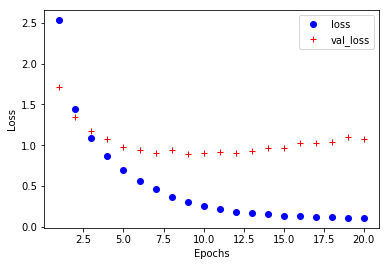

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'loss')
plt.plot(epochs, val_loss_values, 'r+', label ='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

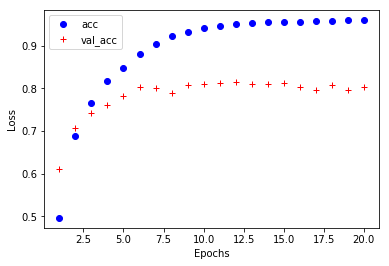

In [56]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'acc')
plt.plot(epochs, val_acc_values, 'r+', label ='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer ='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels,
         epochs = 4,
         batch_size=512)#,
         #validation_data=(x_val,y_val))
            # validation data makes no sense imho

results = model.evaluate(x_test,one_hot_test_labels)

print '\nloss, acc\n', results

Epoch 1/4
8982/8982 [==============================] - 1s - loss: 2.5314 - acc: 0.5117     
Epoch 2/4
8982/8982 [==============================] - 0s - loss: 1.3723 - acc: 0.7088     
Epoch 3/4
8982/8982 [==============================] - 0s - loss: 1.0288 - acc: 0.7826     
Epoch 4/4
2112/2246 [===========================>..] - ETA: 0s
loss, acc
[1.0606053361697378, 0.76892252899341462]


compare this to a "random"-baseline

In [61]:
from copy import copy
import numpy as np
test_labels_copy = copy(test_labels)
np.random.shuffle(test_labels_copy)

print float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.192341941229


In [63]:
test_labels[:10]

array([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3])

In [64]:
test_labels_copy[:10]

array([ 1,  4,  4,  4, 11, 19, 19,  4, 25, 16])

generate topic predictions for test data

In [65]:
predictions = model.predict(x_test)

In [67]:
print predictions[0].shape

(46,)


In [68]:
print np.sum(predictions[0])

1.0


In [69]:
print np.argmax(predictions[0])

3
